In [1]:
#install.packages("igraph")

In [2]:
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [3]:
# install.packages("gsubfn")
library(gsubfn) #allows unpacking multiple return values from functions without using a dummy variable (but needs a fresh R session to work, intitially)

Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"

In [4]:
printf <- function(...) cat(sprintf(...))

In [5]:
logspace <- function( d1, d2, n) exp(log(10)*seq(d1, d2, length.out=n))

In [6]:
remove_zero_freqs = function(distr){
    return (list((1:length(distr))[distr>0], distr[distr>0]))
}

In [7]:
fit_line = function(x, y, log=FALSE){
    if(log){
        slope <- getElement(lm(log(y) ~ log(x))$coefficients[2], "log(x)")
        intercept <- getElement(lm(log(y) ~ log(x))$coefficients[1], "(Intercept)")
    }
    else{
        slope <- getElement(lm(y ~ x)$coefficients[2], "x")
        intercept <- getElement(lm(y ~ x)$coefficients[1], "(Intercept)")
    }
    return (list(slope, intercept))
}

# Part 1 Q-3

## (a)

In [8]:
# pa.exp = alpha
# aging.exp = beta
# zero.deg.appeal = a
# zero.age.appeal = b
# deg.coef = c
# age.coef = d

In [9]:
g <- sample_pa_age(n=1000, m=1, pa.exp = 1, aging.exp=-1, zero.deg.appeal=1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1, directed=F)

[1] -3.183999


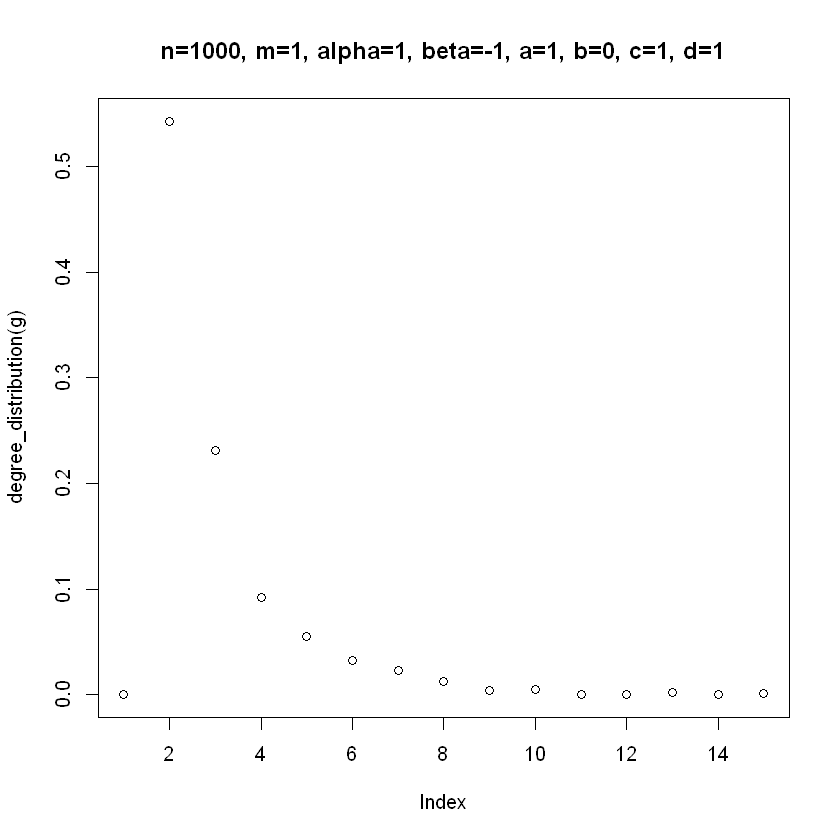

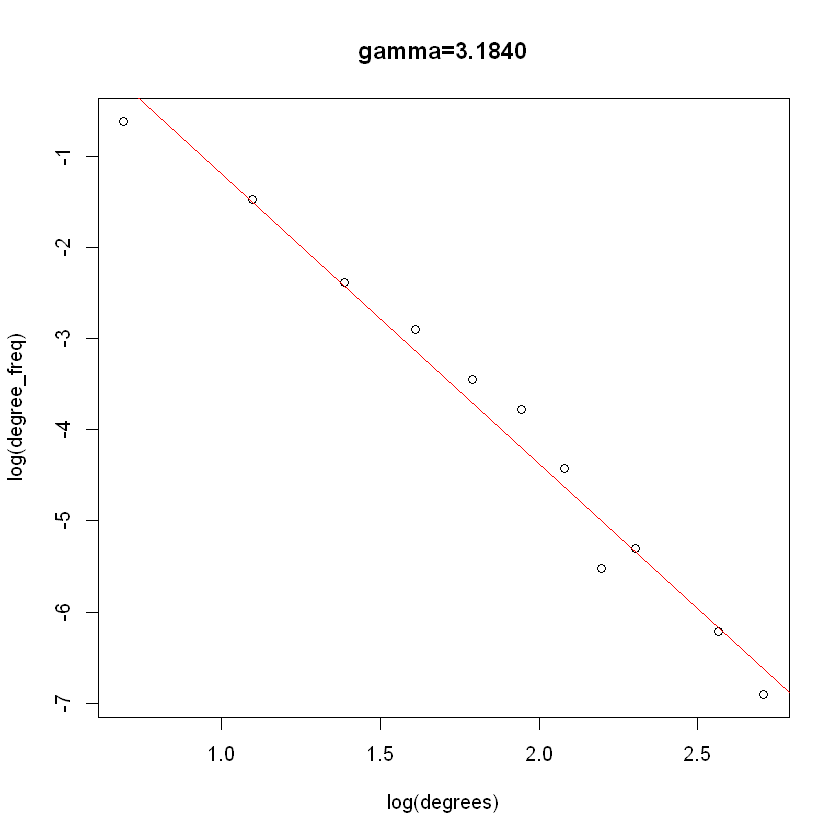

In [10]:
plot(degree_distribution(g), main=sprintf("n=%d, m=%d, alpha=%d, beta=%d, a=%d, b=%d, c=%d, d=%d", 1000, 1, 1, -1, 1, 0, 1, 1))
list[degrees, degree_freq] <- remove_zero_freqs(degree_distribution(g))
list[slope, d] <- fit_line(degrees, degree_freq, log=TRUE)
print(slope)
plot(log(degrees), log(degree_freq), main=sprintf("gamma=%.4f", -slope))
abline(lm(log(degree_freq) ~ log(degrees)), col="red")

## (b)

In [12]:
comms = fastgreedy.community(g, modularity=TRUE)
print(modularity(comms))

[1] 0.9359229


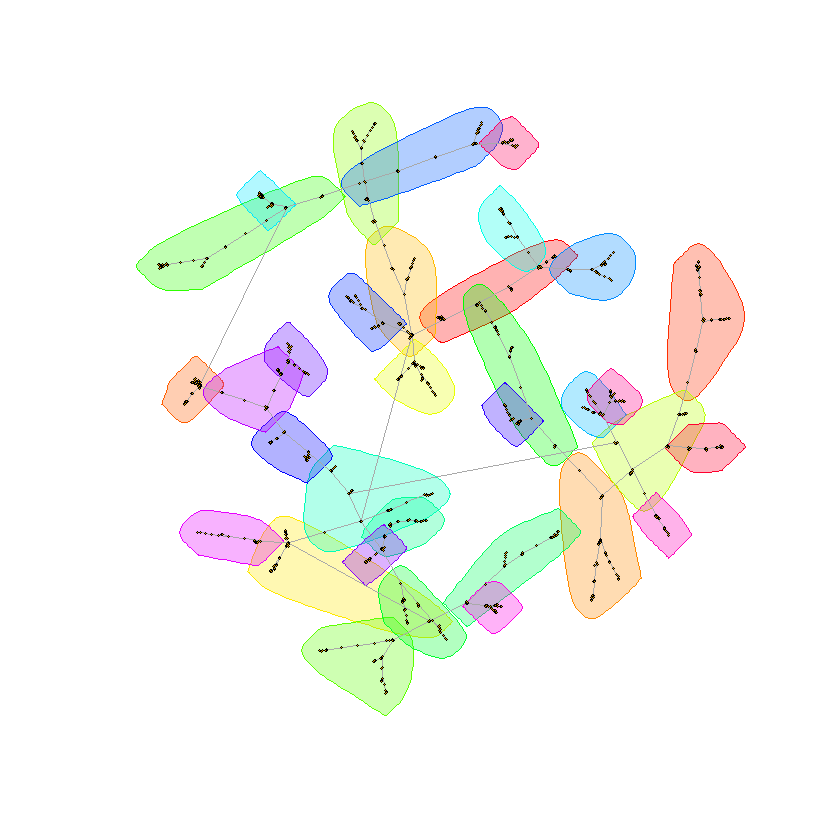

In [13]:
plot(g, mark.groups=groups(comms), vertex.size=1, vertex.label=NA)